In [1]:
import pandas as pd

from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version = 1)

In [2]:
for line in mnist.DESCR.split('\n'):
    print(line)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [3]:
X, y = mnist["data"], mnist["target"]
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [4]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(-0.5, 27.5, 27.5, -0.5)

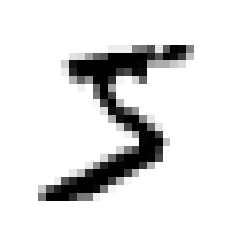

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

#transforma los pixels en para poder plotear
some_digit = np.array(X.iloc[0])
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = "binary")
plt.axis("off")

In [5]:
#transformo la label de string a integer
y = y.astype(np.uint8)

#separamos train y test set
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:] 

In [6]:
#reducimos el problema a detectar solo el numero 5
#armamos las labels
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

y_test_5

60000    False
60001    False
60002    False
60003    False
60004    False
         ...  
69995    False
69996    False
69997    False
69998     True
69999    False
Name: class, Length: 10000, dtype: bool

In [7]:
#Entrenamos un stocastick gradient descent classifier y predecimos labels del primer valor del rtaining set
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state =  42)
sgd_clf.fit(X_train,  y_train_5)
sgd_clf.predict([some_digit])

In [15]:
sdg_train_predictions = sgd_clf.predict(X_train)

In [16]:
#como medimos el error en nuestro training set?
from sklearn.metrics import accuracy_score
accuracy_score(y_train_5, sdg_train_predictions)
Comisión

0.9522666666666667

In [8]:
#Con que metrica vamos a medir la performance de nuestro algoritmo? que pasa si usamos accuracy??
#que es cross validation? porque lo usamos?
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [9]:
#que pasa si predigo solo no 5s
#generamos un estimador que solo devuelva el valor 0 (o sea que clasifico como no 5 a todas las instancias del training set)
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)


In [10]:
#Como performa este clasificacdor con respecto del anterior para la metrica accuracy?
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")


array([0.91125, 0.90855, 0.90915])

In [17]:
#confusion Matrix
#cuenta el numero de veces que la instancia de clase A es clasificada coomo B
from sklearn.model_selection import cross_val_predict

#calculamos todas las labels del training set usando cross validation y chequeamos que nos da la matriz de confusion
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)



In [12]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)
#cada fila es una clase
#la Fila 1 es la Clase 0 (no 5)
#la fila 2 es la clase 1 (es un 5)

#cada columna es como clasifico a esa clase el clasificador
#Columna 1 fueron clasificados como no 5
#columna 2 fueron clasificados como 5

array([[53892,   687],
       [ 1891,  3530]])

In [ ]:
#53892 True negatives (TN)   687 Falsos Positivos  (FP)
#1891 (5s clasificados como no 5) Falsos Negativos (FN)    3530 (5s  clasificados como 5s) TP

In [18]:
#precision y recall
from sklearn.metrics import precision_score, recall_score
#precision = TP / (TP + FP)
#recall = TP / (TP + FN)
#que precision y que recall tenemos?

print("train accuracy:", accuracy_score(y_train_5,sdg_train_predictions))
print("train cv accuracy:", accuracy_score(y_train_5,y_train_pred))
print("precision:",precision_score(y_train_5, y_train_pred)) 
print("recall:",recall_score(y_train_5, y_train_pred))

train accuracy: 0.9522666666666667
train cv accuracy: 0.9570333333333333
precision: 0.8370879772350012
recall: 0.6511713705958311


In [14]:
#F1 score es el prmedio armonico    1 / (1/precision + 1/recall)
#la precision es alta cuando tanto recall y precision lo son
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)



0.7325171197343846

In [ ]:
#ahora vamos a hacer lo mismo para los siguientes algoritmos y compararemos los resultados en clase

#Decision Tree
#Random Forest
#KNN
#logistic regresion
#algun boosting
#una svm
